###Abstract:

Introduction to Graphical Models for Causality:
The guide initiates by establishing the Python environment essential for data analytics, incorporating libraries such as pandas, NumPy, seaborn, matplotlib, and graphviz.
For visual representation of causal links, graphviz is utilized to craft directed graphs.

Preparing the Data:
The guide loads a dataset named cross_sell_email.csv, containing variables like gender, type of cross-sell email, age, and conversion, to examine the effects of these factors on conversion rates.

Illustrating Causal Connections:
Directed acyclic graphs (DAGs), created using graphviz, serve as a crucial tool in depicting the causal influence of variables like age, gender, and email type on conversion rates.
The graphs employ nodes to represent variables and edges to denote causal directions.

Understanding Chains, Forks, and Colliders:
The document explores critical structures within causal graphs:
Chains (A -> B -> C) denote a sequence of causation.
Forks (A <- B -> C) reflect a shared cause.
Colliders (A -> C <- B) represent a variable affected by two distinct variables.

Exploring Confounding and Selection Bias:
It delves into the impact of confounding and selection biases on causal analysis. Confounding involves an external variable influencing both the predictor and outcome variables. Selection bias occurs when the sample does not accurately represent the broader population.

The Role of Conditioning and Adjustments:
Discusses employing conditioning on variables to eliminate backdoor paths and accurately assess causal impacts, pivotal for validating causal relationships.

Causal Effect Identification:
Focuses on identifying causal effects using graphical models as a fundamental phase preceding estimation.

Data Analysis for Causal Insights:
Incorporates Python scripts for examining DAGs and leveraging networkx for exploring variable dependencies, showcasing techniques like d-separation to ascertain variable independence within a given set.

Real-world Applications:
Utilizes practical scenarios, possibly including the effects of consultancy on profits or customer satisfaction, to demonstrate these causal concepts in actionable contexts.

Concluding Thoughts:
Wraps up by highlighting key principles of graphical models for causality, emphasizing the understanding of causation flow, addressing confounding, and the necessity for accurate model specification.

This notebook stands as a comprehensive resource for individuals keen on grasping data-driven causal relationships and their graphical representation and analysis through Python and graphical modeling techniques.

### Graphical Causal Models
Thinking About Causality

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt

color=['0.3', '0.5', '0.7', '0.9']
linestyle=['-', '--', ':', '-.']
marker=['o', 'v', 'd', 'p']

pd.set_option('display.max_rows', 6)

gr.set_default_format("png");

This code snippet is setting up a Python environment for data analysis and visualization, particularly using the pandas, numpy, graphviz, seaborn, and matplotlib libraries. Each line or block of code has a specific function:

1. `import warnings` and `warnings.filterwarnings('ignore')`: These lines import the warnings library and suppress all warnings. This is often done in notebooks to make the output cleaner by not displaying warning messages that can arise from deprecated features or other non-critical issues.

2. `import pandas as pd`: Imports the pandas library and aliases it as `pd`. Pandas is a powerful tool for data manipulation and analysis, particularly for structured data.

3. `import numpy as np`: Imports the numpy library and aliases it as `np`. NumPy is fundamental for scientific computing with Python, offering comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more.

4. `import graphviz as gr`: Imports the graphviz library and aliases it as `gr`. Graphviz is a tool for creating visual representations of graphs (not the chart kind but the nodes-and-edges kind).

5. `from matplotlib import style` and `import seaborn as sns`: These lines import the style module from matplotlib and the seaborn library as `sns`. Seaborn is a statistical data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

6. `from matplotlib import pyplot as plt`: Imports the pyplot module from matplotlib and aliases it as `plt`. This is used for creating static, interactive, and animated visualizations in Python.

7. The next few lines define lists for `color`, `linestyle`, and `marker`:
   - `color=['0.3', '0.5', '0.7', '0.9']`: Defines a list of grayscale values to be used in plots.
   - `linestyle=['-', '--', ':', '-.']`: Defines a list of line styles for plotting.
   - `marker=['o', 'v', 'd', 'p']`: Defines a list of marker styles for plotting points.

8. `pd.set_option('display.max_rows', 6)`: This pandas function sets the option to display a maximum of 6 rows when outputting a DataFrame to the console, making it easier to view large DataFrames.

9. `gr.set_default_format("png")`: This sets the default format for graphviz outputs to be PNG. This is useful for ensuring that the visualizations generated by graphviz are in a widely supported and easily shareable format.

Overall, this code snippet is a preparatory step typically found at the beginning of data analysis and visualization

In [2]:
import pandas as pd
import numpy as np
import io

dataframe = pd.read_csv("https://raw.githubusercontent.com/matheusfacure/causal-inference-in-python-code/main/causal-inference-in-python/data/cross_sell_email.csv")
dataframe

,gender,cross_sell_email,age,conversion
0,0,short,15,0
1,1,short,27,0
2,1,long,17,0
...,...,...,...,...
320,0,no_email,15,0
321,1,no_email,16,0
322,1,long,24,1


#Realising the causal relationships

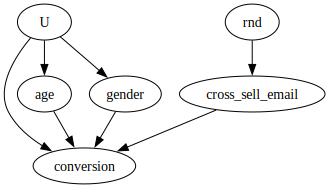

In [3]:
import graphviz as gr

graph_cross_sell = gr.Digraph()

graph_cross_sell.edge("U", "conversion")
graph_cross_sell.edge("U", "age")
graph_cross_sell.edge("U", "gender")

graph_cross_sell.edge("rnd", "cross_sell_email")
graph_cross_sell.edge("cross_sell_email", "conversion")
graph_cross_sell.edge("age", "conversion")
graph_cross_sell.edge("gender", "conversion")

graph_cross_sell

This code snippet is creating a directed graph using the `graphviz` library to visualize relationships or flows between different entities or nodes. Specifically, it's setting up a graph to illustrate factors that might influence "conversion" in a context that suggests cross-selling via email. Let's break down the code:

1. `import graphviz as gr`: This line imports the `graphviz` library and aliases it as `gr`. `graphviz` is a package that facilitates the creation and rendering of graph descriptions in the DOT language of the Graphviz graph drawing software.

2. `graph_cross_sell = gr.Digraph()`: Initializes a new directed graph object called `graph_cross_sell`. A directed graph is a set of nodes connected by edges, where the edges have a direction associated with them.

3. `graph_cross_sell.edge("U", "conversion")`: Adds an edge to the graph from node "U" to node "conversion". This implies that "U" influences or has a relationship leading towards "conversion". The specific nature of "U" isn't defined in this snippet, but it could represent a unique factor or variable in the analysis.

4. `graph_cross_sell.edge("U", "age")` and `graph_cross_sell.edge("U", "gender")`: Similar to the previous step, these lines add edges from "U" to "age" and "gender", respectively, indicating that "U" might influence or determine these attributes.

5. `graph_cross_sell.edge("rnd", "cross_sell_email")`: Adds an edge from "rnd" to "cross_sell_email", suggesting that "rnd" (possibly randomization or a random factor) influences the cross-sell email. This could indicate that the assignment of cross-sell emails is randomized in some way.

6. `graph_cross_sell.edge("cross_sell_email", "conversion")`: This line shows that the cross-sell email has a direct influence on conversion, which is likely the ultimate goal of this analysis—to understand how cross-sell emails affect conversion rates.

7. `graph_cross_sell.edge("age", "conversion")` and `graph_cross_sell.edge("gender", "conversion")`: These lines indicate that both "age" and "gender" directly influence "conversion". This suggests that the analysis is considering how different age groups and genders respond to the cross-selling strategy.

8. `graph_cross_sell`: This line simply references the `graph_cross_sell` object. In an interactive Python environment like Jupyter notebooks, this would display the graph. The graph visualizes the relationships between the various entities: "U", "age", "gender", "rnd", "cross_sell_email", and "conversion", showing the direct and indirect influences on conversion.

Overall, the code uses `graphviz` to model the relationships between different factors involved in a cross-selling scenario, highlighting how various elements might contribute to the conversion process.

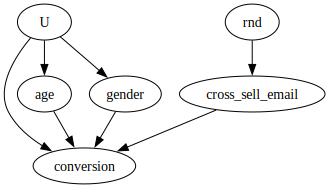

In [4]:
graph_cross_sell = gr.Digraph()

graph_cross_sell.edge("U", "conversion")
graph_cross_sell.edge("U", "age")
graph_cross_sell.edge("U", "gender")

graph_cross_sell.edge("rnd", "cross_sell_email")
graph_cross_sell.edge("cross_sell_email", "conversion")
graph_cross_sell.edge("age", "conversion")
graph_cross_sell.edge("gender", "conversion")

graph_cross_sell

The updated code snippet continues to construct a directed graph using the `graphviz` library, mapping out relationships between various entities or nodes within a scenario, presumably related to marketing or customer behavior analysis focusing on conversion. The directed graph, `graph_cross_sell`, aims to visualize how different factors, such as demographics (age, gender) and marketing strategies (cross_sell_email), contribute to the conversion process. Here's a detailed breakdown of the actions taken in the code:

1. **Initialize the Directed Graph**:
   - `graph_cross_sell = gr.Digraph()`: This line creates a new directed graph object named `graph_cross_sell`. A directed graph is characterized by its directed edges, meaning the relationships have a direction (from one node to another).

2. **Define Edges and Relationships**:
   - The `.edge()` method is used to define a directional relationship between two nodes (or entities). The first argument is the source node, and the second argument is the target node, representing the direction of influence or flow.
   - `graph_cross_sell.edge("U", "conversion")`: Adds an edge indicating that entity "U" (undefined in this snippet, but possibly a unique identifier for a factor or variable) influences "conversion".
   - `graph_cross_sell.edge("U", "age")` and `graph_cross_sell.edge("U", "gender")`: These lines suggest that the same entity "U" also influences the "age" and "gender" attributes of subjects or entities in the analysis.
   - `graph_cross_sell.edge("rnd", "cross_sell_email")`: Indicates that "rnd" (potentially a variable for randomness or a randomized treatment) affects the delivery or nature of "cross_sell_email", a marketing effort aimed at promoting additional products or services.
   - `graph_cross_sell.edge("cross_sell_email", "conversion")`: Shows a direct influence of receiving a cross-sell email on achieving a "conversion", which is typically defined as a desired action taken by a customer, like making a purchase.
   - `graph_cross_sell.edge("age", "conversion")` and `graph_cross_sell.edge("gender", "conversion")`: Indicate that both the age and gender of the individual directly affect the likelihood of conversion, suggesting these demographic factors are important in understanding conversion outcomes.

3. **Display the Graph**:
   - `graph_cross_sell`: By simply referencing the graph object at the end of the code, it's implied that the intention is to display the constructed graph. In an interactive Python environment, such as a Jupyter notebook, this would render the graph visually, illustrating the nodes and directed edges as specified.

The graph thus constructed offers a visual representation of hypotheses or known relationships within a dataset or study, focusing on how various factors influence the conversion process, potentially informing marketing strategies or customer segmentation.

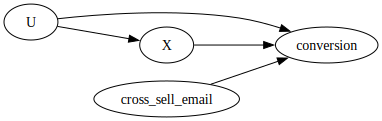

In [5]:
# rankdir:LR layers the graph from left to right
graph_cross_sell = gr.Digraph(graph_attr={"rankdir": "LR"})

graph_cross_sell.edge("U", "conversion")
graph_cross_sell.edge("U", "X")

graph_cross_sell.edge("cross_sell_email", "conversion")
graph_cross_sell.edge("X", "conversion")

graph_cross_sell

The given code snippet further evolves the directed graph creation using the `graphviz` library, now incorporating an additional attribute to influence the graph's layout direction. Let's break it down:

1. **Graph Initialization with Attributes**:
   - `graph_cross_sell = gr.Digraph(graph_attr={"rankdir": "LR"})`: This creates a new directed graph object, `graph_cross_sell`, with a specified graph attribute. The `graph_attr` parameter is a dictionary where `"rankdir": "LR"` sets the graph's layout direction from left to right (LR). This means that the nodes will be arranged horizontally, with the source nodes on the left and target nodes to the right, which can enhance readability for certain types of flow diagrams or hierarchical structures.

2. **Adding Edges to the Graph**:
   - The `.edge()` method adds directed edges between nodes, defining the relationships or flows between them.
   - `graph_cross_sell.edge("U", "conversion")`: This line adds an edge from node "U" to "conversion", indicating that "U" influences or has a relationship leading to "conversion". The nature of "U" is not specified but can be interpreted as a factor or variable in the context of the graph.
   - `graph_cross_sell.edge("U", "X")`: Adds an edge from "U" to another node "X", which suggests that "U" also influences "X". Without further context, "X" can be another variable or factor in the analysis.
   - `graph_cross_sell.edge("cross_sell_email", "conversion")`: Indicates a direct influence of "cross_sell_email" on "

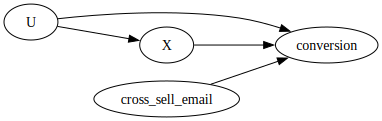

In [6]:
graph_cross_sell = gr.Digraph(graph_attr={"rankdir": "LR"})

graph_cross_sell.edge("U", "conversion")
graph_cross_sell.edge("U", "X")

graph_cross_sell.edge("cross_sell_email", "conversion")
graph_cross_sell.edge("X", "conversion")

graph_cross_sell

This code constructs a directed graph using the `graphviz` library, with the intention of visualizing relationships among different elements in a scenario that seems to focus on conversion—likely in a marketing or sales context. The directed graph is designed to show how various factors influence the conversion process, with the layout of the graph set to orient from left to right. Here's a step-by-step explanation:

1. **Graph Initialization with Layout Direction**:
   - `graph_cross_sell = gr.Digraph(graph_attr={"rankdir": "LR"})`: Initializes a new directed graph object named `graph_cross_sell`. The `graph_attr` parameter is used to set attributes for the graph, with `"rankdir": "LR"` specifying that the graph should be laid out from left to right. This orientation is helpful for visually tracing the flow of influence or processes in a linear or sequential manner.

2. **Defining the Edges**:
   - `.edge()` methods are used to add edges between nodes (or vertices) in the graph, representing directional relationships or influences.
   - `graph_cross_sell.edge("U", "conversion")` and `graph_cross_sell.edge("U", "X")`: These lines add edges from a node labeled "U" to nodes labeled "conversion" and "X", respectively. "U" could represent an unidentified factor or variable that influences both the conversion process and another variable "X".
   - `graph_cross_sell.edge("cross_sell_email", "conversion")`: Adds an edge from "cross_sell_email" to "conversion", illustrating that the act of sending a cross-sell email is directly aimed at influencing conversions.
   - `graph_cross_sell.edge("X", "conversion")`: Shows a direct relationship from "X" to "conversion", indicating that whatever "X" represents, it is also a contributing factor to conversion.

3. **Rendering the Graph**:
   - Simply referencing `graph_cross_sell` at the end of the code suggests the intention to display the graph. In an interactive Python environment (such as Jupyter Notebooks), this line would render the graph visually, according to the defined nodes and edges. The "LR" (left to right) orientation helps to clarify the sequence or hierarchy of influences leading to conversion.

Overall, the code visually maps out a theoretical model where both identified (e.g., "cross_sell_email") and unidentified ("U", "X") factors contribute to the conversion process, with the layout designed to facilitate understanding of the directional relationships between these factors.

In [ ]:
### Are Consultants reliable?

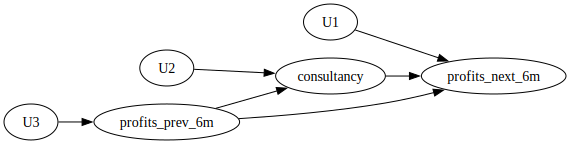

In [7]:
graph_consultancy = gr.Digraph(graph_attr={"rankdir": "LR"})

graph_consultancy.edge("U1", "profits_next_6m")
graph_consultancy.edge("U2", "consultancy")
graph_consultancy.edge("U3", "profits_prev_6m")

graph_consultancy.edge("consultancy", "profits_next_6m")

graph_consultancy.edge("profits_prev_6m", "consultancy")
graph_consultancy.edge("profits_prev_6m", "profits_next_6m")

graph_consultancy

The code snippet you've provided outlines the creation of a directed graph using the `graphviz` library, aiming to depict relationships between various elements related to a consultancy scenario, specifically focusing on how different factors influence the profits for the next 6 months. The directed graph, `graph_consultancy`, is set up with a layout that progresses from left to right, representing the flow of influence or causality. Here’s a breakdown of the elements and their implications:

1. **Graph Initialization with Layout Direction**:
   - `graph_consultancy = gr.Digraph(graph_attr={"rankdir": "LR"})`: This initializes a new directed graph object named `graph_consultancy`. The `graph_attr={"rankdir": "LR"}` sets the graph's direction to be from left to right, which is particularly useful for visualizing processes or temporal relationships over time.

2. **Defining the Edges**:
   - `graph_consultancy.edge("U1", "profits_next_6m")`: This line adds an edge from a node labeled "U1" to "profits_next_6m", suggesting that the unidentified factor "U1" influences the company's profits in the next 6 months.
   - `graph_consultancy.edge("U2", "consultancy")` and `graph_consultancy.edge("U3", "profits_prev_6m")`: These edges indicate that factors "U2" and "U3" influence "consultancy" services and profits in the previous 6 months, respectively. The specifics of "U2" and "U3" are not described, implying they could be any number of factors (e.g., market conditions, internal strategies, etc.).
   - `graph_consultancy.edge("consultancy", "profits_next_6m")`: Shows a direct influence of consultancy services on the profits expected in the next 6 months. This is a key relationship, highlighting the consultancy's role in improving future profitability.
   - `graph

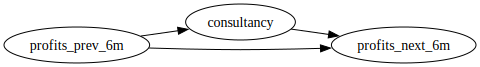

In [8]:
graph_consultancy = gr.Digraph(graph_attr={"rankdir":"LR"})

graph_consultancy.edge("consultancy", "profits_next_6m")
graph_consultancy.edge("profits_prev_6m", "consultancy")
graph_consultancy.edge("profits_prev_6m", "profits_next_6m")

graph_consultancy

This code snippet creates a directed graph using the `graphviz` library to model the relationship between consultancy services and profit over two periods: the previous 6 months and the next 6 months. Here's a breakdown of what each part of the code does:

1. **Graph Initialization with Layout Direction**:
   - `graph_consultancy = gr.Digraph(graph_attr={"rankdir":"LR"})`: Initializes a new directed graph named `graph_consultancy`. The `graph_attr={"rankdir":"LR"}` specifies the direction of the graph layout from left to right (LR), which is particularly useful for illustrating sequences or temporal relationships, showing the progression of time or the flow of influence.

2. **Adding Edges to Define Relationships**:
   - The `.edge()` method adds directed edges between pairs of nodes, indicating the direction of influence or relationship.
   - `graph_consultancy.edge("consultancy", "profits_next_6m")`: This edge represents the direct influence of consultancy services on the profits for the next 6 months, suggesting that engaging in consultancy services is expected to impact future profitability.
   - `graph_consultancy.edge("profits_prev_6m", "consultancy")`: Adds an edge from "profits_prev_6m" to "consultancy", illustrating that the profits earned in the previous 6 months can affect the decision to engage in consultancy services. This could imply that higher previous profits might lead to more investment in consultancy services as a strategy for growth.
   - `graph_consultancy.edge("profits_prev_6m", "profits_next_6m")`: This edge indicates a relationship between profits in the previous 6 months and the expected profits in the next 6 months. It suggests that past profitability may be used to predict or influence future profitability, either directly or through factors like reinvestment, budget allocation, or strategic planning.

3. **Rendering the Graph**:
   - By referencing `graph_consultancy` at the end of the code (though the snippet does not explicitly display this line), the intention is to render the graph. In an interactive Python environment, such as Jupyter Notebook, this would visualize the graph, showing the nodes ("consultancy", "profits_prev_6m", "profits_next_6m") and the directed edges that connect them, according to the relationships defined in the code.

This visualization helps to conceptualize and communicate the hypothesized impact of consultancy services on a company's profitability, considering both past performance and future expectations. The directional flow from left to right aids in understanding the sequential or causal relationships among the variables.

### Crash Course in Graphical Models
#### Chains

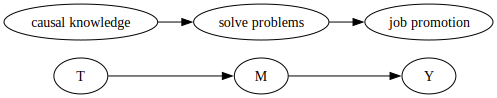

In [9]:
graphh = gr.Digraph(graph_attr={"rankdir": "LR"})

graphh.edge("T", "M")
graphh.edge("M", "Y")
graphh.node("M", "M")


graphh.edge("causal knowledge", "solve problems")
graphh.edge("solve problems", "job promotion")

graphh

The provided code snippet utilizes the `graphviz` library to create a directed graph, `graphh`, with the layout oriented from left to right (`"rankdir": "LR"`). This graph is designed to visualize a series of relationships or flows between different nodes or entities, which could represent concepts, processes, or objects depending on the context. Here’s an explanation of each part:

1. **Graph Initialization**:
   - `graphh = gr.Digraph(graph_attr={"rankdir": "LR"})`: Initializes a new directed graph object named `graphh`. The `graph_attr` parameter with `{"rankdir": "LR"}` sets the graph's orientation to be from left to right, aiding in illustrating linear or sequential processes.

2. **Defining Nodes and Edges**:
   - `graphh.edge("T", "M")` and `graphh.edge("M", "Y")`: These commands add edges between nodes "T" to "M", and "M" to "Y", respectively. This sequence could symbolize a process or a series of transformations from "T" through "M" to "Y".
   - `graphh.node("M", "M")`: Explicitly defines a node "M". This is somewhat redundant in this context because the node "M" is already implied by the edges defined. However, this command can be useful for adding specific attributes to the node "M" if needed.
   - `graphh.edge("causal knowledge", "solve problems")` and `graphh.edge("solve problems", "job promotion")`: These commands establish a conceptual flow or logical sequence from having "causal knowledge", leading to the ability to "solve problems", which then potentially results in a "job promotion". This part of the graph suggests a pathway through which gaining knowledge and applying it to problem-solving can contribute to career advancement.

3. **Rendering the Graph**:
   - While the code snippet ends with `graphh`, in an interactive environment like a Jupyter Notebook, this would display the constructed graph. The visualization should depict the nodes and the directed edges connecting them, showcasing the relationships or sequences established in the code.

This graph serves as a visual representation of two main ideas: a sequence from "T" to "Y" through "M", and a more conceptual pathway from acquiring "causal knowledge", through "solve problems", to achieving a "job promotion". The use of a directed graph helps in understanding the directionality of these relationships, illustrating how one step leads to another in a linear or hierarchical manner.

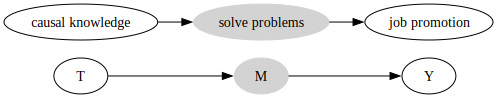

In [10]:
graphh = gr.Digraph(graph_attr={"rankdir": "LR"})

graphh.edge("T", "M")
graphh.edge("M", "Y")
graphh.node("M", "M")
graphh.node("M", color="lightgrey", style="filled")


graphh.edge("causal knowledge", "solve problems")
graphh.edge("solve problems", "job promotion")
graphh.node("solve problems", color="lightgrey", style="filled")

graphh

 Initialization of the Graph:
graphh = gr.Digraph(graph_attr={"rankdir": "LR"}): This line initializes a new directed graph, graphh, with an attribute to layout the graph from left to right ("LR" for Left to Right). This sets the direction in which the nodes (variables or concepts) will be aligned in the visualization.

Creation of Edges and Nodes:
.edge("T", "M"): This adds a directed edge from node "T" to node "M", indicating a causal or directional relationship from "T" to "M".
.edge("M", "Y"): Similar to the first edge, this adds a directed edge from node "M" to node "Y", indicating a relationship or influence from "M" to "Y".
These edges suggest a chain of influence: "T" influences "M", which in turn influences "Y".

Styling Specific Nodes:
.node("M", "M"): This line might seem redundant as adding edges automatically creates the nodes. This command is often used to add attributes to a node or to ensure its creation without connecting edges, but here it's specifying "M" again without new attributes.
.node("M", color="lightgrey", style="filled"): This modifies the node "M" by filling it with a light grey color, making it stand out visually. This could be used to highlight important or central variables in the causal pathway.

Expanding the Graph with Additional Causal Pathways:
.edge("causal knowledge", "solve problems") and .edge("solve problems", "job promotion"): These lines introduce another pathway suggesting that "causal knowledge" leads to "solve problems", which in turn leads to "job promotion".
.node("solve problems", color="lightgrey", style="filled"): This colors the node "solve problems" in light grey, highlighting it as an important variable in the pathway from "causal knowledge" to "job promotion".
This graph visualization is a powerful tool for representing and reasoning about causal relationships. The specific relationships here suggest two pathways: one from "T" through "M" to "Y", highlighting a sequential influence, and another showing that acquiring "causal knowledge" can lead to "solving problems", which subsequently may lead to a "job promotion". Highlighting nodes like "M" and "solve problems" possibly indicates their pivotal roles in their respective causal chains.

Graphviz diagrams like this are commonly used in causal inference to visually depict and analyze the assumed causal relationships between variables, aiding in understanding complex systems or processes.

#### Forks

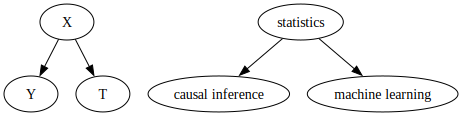

In [11]:
graphh = gr.Digraph()


graphh.edge("X", "Y")
graphh.edge("X", "T")
graphh.node("X", "X")

graphh.edge("statistics", "causal inference")
graphh.edge("statistics", "machine learning")

graphh


Graph Initialization:
graphh = gr.Digraph(): This line initializes a new directed graph named graphh without specifying layout attributes, which means it will use Graphviz's default layout settings (typically top to bottom).
Defining Edges:
.edge("X", "Y"): Creates a directed edge from node "X" to node "Y". This implies a directional relationship or influence from "X" to "Y".
.edge("X", "T"): Adds another directed edge from node "X" to node "T". Similar to the first edge, this indicates that "X" influences or is related to "T".
These edges suggest that "X" is a common source or influence for both "Y" and "T".

Node Specification:
.node("X", "X"): Explicitly defines the node "X". In this context, this line might seem redundant since adding edges already ensures the creation of nodes. However, this method can be used for adding specific attributes or labels to the node, although no unique attributes are added here.

Additional Causal Pathways:
.edge("statistics", "causal inference"): Illustrates that "statistics" is foundational or directly contributes to "causal inference". This implies a knowledge or methodological flow from the study of statistics to the field of causal inference.

.edge("statistics", "machine learning"): Similarly, shows that "statistics" also directly contributes to "machine learning". This edge underscores the importance of statistical principles in the development and understanding of machine learning algorithms.

The overall structure of the graph you're creating with these commands depicts two main conceptual clusters:

The first cluster, centered around "X", demonstrates how "X" is a precursor or influencing factor for both "Y" and "T". This could be interpreted in numerous ways depending on the context—scientifically, "X" might be a variable affecting two outcomes; in a project management sense, "X" might be a foundational task that branches into two subsequent tasks, "Y" and "T".
The second cluster highlights the foundational role of "statistics" in both "causal inference" and "machine learning". This is reflective of the real-world relationship between these disciplines, emphasizing that a solid understanding of statistical methods is crucial for advancing in either causal inference studies or machine learning applications.

In essence, this graph is a visual representation of influence and foundational relationships between different concepts or variables, illustrating the multifaceted impact of certain nodes (like "X" and "statistics") on multiple outcomes or fields of study (like "Y", "T", "causal inference", and "machine learning").

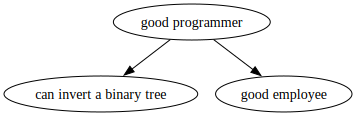

In [12]:
graphh = gr.Digraph()

graphh.edge("good programmer", "can invert a binary tree")
graphh.edge("good programmer", "good employee")

graphh

In your Graphviz directed graph, you're illustrating a specific set of relationships between being a "good programmer" and other attributes or achievements, notably the ability to "invert a binary tree" and being a "good employee." Let's dissect what this graph represents:

Graph Initialization:
graphh = gr.Digraph(): Initializes a new directed graph, graphh. By default, Graphviz will arrange this graph vertically (top to bottom) unless specified otherwise.
Defining Relationships:
.edge("good programmer", "can invert a binary tree"): Creates a directed edge from "good programmer" to "can invert a binary tree". This suggests that the ability to invert a binary tree is seen as a consequence or characteristic of being a good programmer. It reflects a common trope or test in programming interviews and challenges, implying that mastering such tasks is indicative of programming prowess.
.edge("good programmer", "good employee"): Adds another directed edge from "good programmer" to "good employee". This line posits that being a good programmer is directly linked to being a good employee. It implies that the skills, mindset, or work ethic associated with proficient programmers contribute positively to their overall performance as employees.
The graph's structure visually communicates the idea that the qualities or skills of a "good programmer" directly contribute to or result in specific desirable outcomes, such as the technical skill to "invert a binary tree" and the broader professional quality of being a "good employee."

This visualization serves as a conceptual model, representing the belief that technical proficiency, exemplified by solving complex algorithmic problems, is intrinsically linked to professional efficacy and value. It simplifies and highlights perceived relationships within the programming and tech industry, focusing on the virtues of technical skill and its perceived correlation with broader professional competencies.

### Immorality or Collider

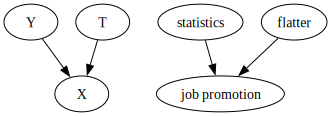

In [13]:
graphh = gr.Digraph()

graphh.edge("Y", "X")
graphh.edge("T", "X")

graphh.edge("statistics", "job promotion")
graphh.edge("flatter", "job promotion")

graphh

edge("Y", "X") and .edge("T", "X"): These commands establish directed edges from "Y" to "X" and from "T" to "X", respectively. This indicates that both "Y" and "T" have a direct influence or causal relationship leading towards "X". It could represent a scenario where "X" is an outcome or effect influenced by two different factors or causes, "Y" and "T".

edge("statistics", "job promotion") and .edge("flatter", "job promotion"): Here, you're setting up relationships from "statistics" and "flatter" to "job promotion". This suggests that both having expertise in "statistics" and the act of "flattering" are seen as pathways or contributing factors towards achieving a "job promotion". It reflects a perspective that professional advancement can be influenced by both hard skills (like statistical knowledge) and soft skills or behaviors (such as the ability to flatter).


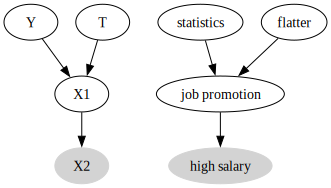

In [14]:
graphh = gr.Digraph()

graphh.edge("Y", "X1")
graphh.edge("T", "X1")
graphh.edge("X1", "X2")
graphh.node("X2", color="lightgrey", style="filled")

graphh.edge("statistics", "job promotion")
graphh.edge("flatter", "job promotion")
graphh.edge("job promotion", "high salary")

graphh.node("high salary", color="lightgrey", style="filled")

graphh

The graph is initialized without specific attributes, meaning it will use Graphviz's default settings, likely arranging the graph in a top-down layout.

First Set of Relationships:
.edge("Y", "X1") and .edge("T", "X1"): These commands create directed edges from "Y" to "X1" and from "T" to "X1", respectively. This setup implies that both "Y" and "T" are influencing factors or precursors to "X1". It suggests a scenario where "X1" is an outcome or condition that is directly affected by "Y" and "T".

.edge("X1", "X2"): Adds a directed edge from "X1" to "X2", indicating a progression or influence from "X1" to "X2". This represents a sequential relationship, where "X1" contributes to or is a necessary condition for "X2".

.node("X2", color="lightgrey", style="filled"): This styles "X2" with a light grey fill, likely highlighting it as an important outcome or key node within this pathway.

Second Set of Relationships:
.edge("statistics", "job promotion") and .edge("flatter", "job promotion"): These edges indicate that both possessing knowledge in "statistics" and the ability to "flatter" can lead to "job promotion". This part of the graph suggests a dual-pathway to achieving a job promotion, recognizing the value of both hard skills and interpersonal skills.

.edge("job promotion", "high salary"): Introduces a progression from "job promotion" to "high salary", implying that obtaining a job promotion is a step towards achieving a higher salary. This reflects a common career progression narrative where promotions are associated with salary increases.

.node("high salary", color="lightgrey", style="filled"): Applies a visual highlight to "high salary", marking it as a significant outcome, possibly the ultimate goal in the context of career development and progression.


### The Flow of Association Cheat Sheet
#### Querying a Graph in Python

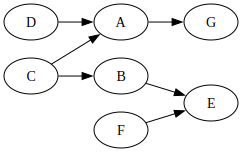

In [15]:
graphh = gr.Digraph(graph_attr={"rankdir": "LR"})
graphh.edge("C", "A")
graphh.edge("C", "B")
graphh.edge("D", "A")
graphh.edge("B", "E")
graphh.edge("F", "E")
graphh.edge("A", "G")

graphh

Graph Initialization and Layout:
graphh = gr.Digraph(graph_attr={"rankdir": "LR"}): Initializes a new directed graph with the attribute to layout the graph from left to right. This orientation is useful for visualizing processes or hierarchies where a left-to-right progression represents a sequence or flow of influence.

Defining Relationships:
.edge("C", "A") and .edge("D", "A"): Both "C" and "D" have directed edges pointing to "A", indicating that "A" is influenced by or is a consequence of both "C" and "D". This could represent a scenario where "A" is an outcome or event that requires the input or conditions "C" and "D".

.edge("C", "B"): Indicates that "C" also leads to or influences "B", suggesting a shared factor or cause between "A" and "B" originating from "C".

.edge("B", "E") and .edge("F", "E"): Similar to "A", "E" is influenced by two separate nodes, "B" and "F". "E" could represent an outcome or state that is dependent on both "B" and "F".

.edge("A", "G"): This shows a direct influence from "A" to "G", suggesting that "G" is a subsequent outcome or effect of "A". Given the previous relationships, "G" could be seen as a final outcome in this particular network, influenced directly and indirectly by multiple upstream factors or nodes.

Interpretation:
The graph visually articulates a system of dependencies or a process flow where certain nodes are pivotal in leading to a final outcome ("G"). For example, "C" indirectly affects "G" through its influence on both "A" and "B", with "A" directly contributing to "G".
This setup can represent various real-world systems or conceptual models, such as project management flows, where "G" is the project's completion influenced by various tasks ("A", "B", "E") and sub-tasks or conditions ("C", "D", "F").

General Observations:
The graph's layout and directed edges help in understanding the complexity of relationships and dependencies among the nodes. It's a useful tool for mapping out pathways, influences, or hierarchies in a visually intuitive manner.

In summary, your Graphviz graph elegantly illustrates a network of influences culminating in a specific outcome, "G", showcasing the interconnectedness of various elements or conditions leading up to this point. It's a graphical representation that can be applied to multiple domains to understand the dynamics between different factors or stages within a system or process.

In [16]:
import networkx as nx

model = nx.DiGraph([
    ("C", "A"),
    ("C", "B"),
    ("D", "A"),
    ("B", "E"),
    ("F", "E"),
    ("A", "G"),
])

Here's what the edges represent:
("C", "A") and ("D", "A"): Nodes "C" and "D" both point to "A", suggesting "A" is influenced by "C" and "D".

("C", "B"): "C" also points to "B", indicating a direct influence or relationship.

("B", "E") and ("F", "E"): Both "B" and "F" point to "E", showing that "E" is influenced by these nodes.

("A", "G"): Finally, "A" points to "G", suggesting a sequence where "G" is a consequence or result of "A".

In [17]:
print("Are D and C dependent?")
print(not(nx.d_separated(model, {"D"}, {"C"}, {})))

print("Are D and C dependent given A?")
print(not(nx.d_separated(model, {"D"}, {"C"}, {"A"})))

print("Are D and C dependent given G?")
print(not(nx.d_separated(model, {"D"}, {"C"}, {"G"})))

Are D and C dependent?
False
Are D and C dependent given A?
True
Are D and C dependent given G?
True


Are "D" and "C" dependent?
not(nx.d_separated(model, {"D"}, {"C"}, {})): This line checks whether "D" and "C" are d-separated (conditionally independent) without any conditioning on other nodes. The not function reverses the result since nx.d_separated returns True if the nodes are d-separated (independent) and False otherwise. In this context, you're asking if "D" and "C" are dependent without considering any other nodes. The expectation is that "D" and "C" are dependent since there's no conditioning set, and they are part of a connected graph structure where paths can influence each other.

Are "D" and "C" dependent given "A"?
not(nx.d_separated(model, {"D"}, {"C"}, {"A"})): Here, you're asking if "D" and "C" remain dependent when you condition on "A". Conditioning on "A" can potentially block some of the paths between "D" and "C", altering their dependency relationship. The outcome depends on the specific structure of your graph and how "A" interacts with paths between "D" and "C".

Are "D" and "C" dependent given "G"?
not(nx.d_separated(model, {"D"}, {"C"}, {"G"})): This checks the dependency between "D" and "C" when conditioning on "G". Similar to the previous case, conditioning on "G" might block or open paths between "D" and "C", affecting their dependency. The result will illustrate how "G" influences the relationship between "D" and "C" 
within the network.

These checks are powerful for understanding the underlying causal structure and dependencies within your graph. They help in identifying how different nodes (variables) influence each other directly or indirectly, and how conditioning on certain nodes can change these influence patterns. This kind of analysis is crucial in causal inference, allowing researchers to design experiments or analyses that accurately reflect the causal relationships they're interested in exploring.

In [18]:
print("Are G and D dependent?")
print(not(nx.d_separated(model, {"G"}, {"D"}, {})))

print("Are G and D dependent given A?")
print(not(nx.d_separated(model, {"G"}, {"D"}, {"A"})))

Are G and D dependent?
True
Are G and D dependent given A?
False


In [19]:
print("Are A and B dependent?")
print(not(nx.d_separated(model, {"A"}, {"B"}, {})))

print("Are A and B dependent given C?")
print(not(nx.d_separated(model, {"A"}, {"B"}, {"C"})))

Are A and B dependent?
True
Are A and B dependent given C?
False


In [20]:
print("Are G and F dependent?")
print(not(nx.d_separated(model, {"G"}, {"F"}, {})))

print("Are G and F dependent given E?")
print(not(nx.d_separated(model, {"G"}, {"F"}, {"E"})))

Are G and F dependent?
False
Are G and F dependent given E?
True


### Identification Revisited

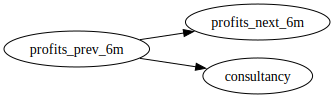

In [21]:
consultancy_sev = gr.Digraph(graph_attr={"rankdir": "LR"})
consultancy_sev.edge("profits_prev_6m", "profits_next_6m")
consultancy_sev.edge("profits_prev_6m", "consultancy")

consultancy_sev


Graph Initialization and Layout:
consultancy_sev = gr.Digraph(graph_attr={"rankdir": "LR"}): This line initializes a new directed graph named consultancy_sev with the layout direction set from left to right. This orientation is often chosen to represent sequences or progressions over time in a clear and intuitive manner.

Defining Relationships:
.edge("profits_prev_6m", "profits_next_6m"): This edge signifies a direct relationship from the profits in the previous 6 months ("profits_prev_6m") to the profits in the next 6 months ("profits_next_6m"), suggesting that earlier profits influence or are correlated with future profits. It reflects a temporal progression where past financial performance may impact future performance.

.edge("profits_prev_6m", "consultancy"): Another edge from "profits_prev_6m" to "consultancy" indicates that the profits in the previous 6 months may influence or determine the engagement with consultancy services. This could suggest that the financial performance of the preceding period could be a factor in deciding whether to seek consultancy.

Interpretation:
The graph presents a model where the profits from the previous 6 months are central to understanding both the future profits and the decision to engage with consultancy services. This could represent a scenario in a business or organizational context where past financial results are used to make decisions about future strategies and investments, including the hiring of consultants to potentially improve future performance.

The graph might be interpreted to imply causation or correlation, depending on the context. For instance, it could be posited that good financial performance increases the likelihood of investing in consultancy to sustain or enhance future profits.

Visualization and Analysis:
While the description and commands set up the structure of the graph, viewing the actual visualization would require rendering the graph using Graphviz software or an equivalent tool in your programming environment. This visual representation would make the relationships and the flow of influence more apparent.

In [22]:
consultancy_model_severed = nx.DiGraph([
    ("profits_prev_6m", "profits_next_6m"),
    ("profits_prev_6m", "consultancy"),
#     ("consultancy", "profits_next_6m"), # causal relationship removed
])

not(nx.d_separated(consultancy_model_severed,
                   {"consultancy"}, {"profits_next_6m"}, {}))

True

In the networkx directed graph consultancy_model_severed, you're modeling relationships between profits from the previous 6 months, profits for the next 6 months, and consultancy services. Notably, you've intentionally removed the direct causal link from "consultancy" to "profits_next_6m" that might have been considered in a previous model. This adjustment focuses the model on examining whether the engagement in consultancy services is directly tied to changes in profits in the next 6 months without assuming a direct causal path.

The not(nx.d_separated(...)) function call is used to check whether "consultancy" and "profits_next_6m" are d-separated in the absence of conditioning on any other variables. In causal inference, d-separation (directional separation) is a criterion for determining whether two sets of variables are independent, given a set of conditioning variables. If two variables are d-separated, they are conditionally independent, given the conditioning variables.

Here, since you're not conditioning on any variables (the last parameter is an empty set {}), the call effectively checks if there's any path that makes "consultancy" and "profits_next_6m" dependent on each other in the given graph.

If the result is True, it means "consultancy" and "profits_next_6m" are not d-separated; hence, there exists some indirect path(s) in the graph through which they can influence each other, despite the direct causal link being removed. This could imply that the relationship between consultancy services and the next 6 months' profits could be mediated by other variables (like "profits_prev_6m").

If the result is False, it would imply that, in the absence of direct causal links and without conditioning on other variables, "consultancy" and "profits_next_6m" are d-separated, indicating no identifiable indirect path through which "consultancy" could influence "profits_next_6m" in this simplified model.

Given the structure of consultancy_model_severed you provided, the expected result is True because "profits_prev_6m" serves as a common cause for both "consultancy" and "profits_next_6m", creating an indirect path that links "consultancy" and "profits_next_6m" even in the absence of a direct causal link. This setup reflects the complexity of determining causation and the importance of considering indirect influences when direct paths are not evident or have been intentionally severed for analysis.

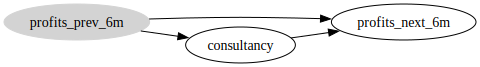

In [23]:
g_consultancy = gr.Digraph(graph_attr={"rankdir":"LR"})
g_consultancy.edge("profits_prev_6m", "profits_next_6m")
g_consultancy.edge("profits_prev_6m", "consultancy")
g_consultancy.edge("consultancy", "profits_next_6m")
g_consultancy.node("profits_prev_6m", color="lightgrey", style="filled")

g_consultancy

In this Graphviz directed graph g_consultancy, you've constructed a model to visually represent the relationships between profits from the previous 6 months, consultancy services, and profits for the next 6 months. The graph's layout is set from left to right ("LR"), making it easy to follow the temporal or logical progression of influences. Here's an interpretation based on your description:

Graph Initialization and Layout:
g_consultancy = gr.Digraph(graph_attr={"rankdir":"LR"}): Initializes a new directed graph with the layout direction specified from left to right. This orientation is particularly useful for depicting processes or sequences that have a clear directional flow, such as time progression in this case.

Defining Relationships and Highlighting Nodes:
.edge("profits_prev_6m", "profits_next_6m"): This edge suggests that the profits from the previous 6 months have a direct influence on the profits for the next 6 months. It could represent a straightforward projection where past performance is expected to influence future outcomes.

.edge("profits_prev_6m", "consultancy"): Indicates that the profits from the previous 6 months may also influence the decision to engage consultancy services. This could reflect a scenario where financial performance drives decisions on seeking external advice or services.

.edge("consultancy", "profits_next_6m"): Adds a direct link from consultancy to the profits for the next 6 months, suggesting that engaging in consultancy services is expected to have an impact on future financial performance. This implies a belief in the effectiveness of consultancy in improving or affecting profits.

.node("profits_prev_6m", color="lightgrey", style="filled"): This command highlights the "profits_prev_6m" node, perhaps to emphasize its central role in the model as both a determinant of future profits and a factor influencing the decision to seek consultancy.

The light grey fill increases its visual prominence, making it clear that this node is of particular interest or importance in the model.

Interpretation and Application:
The graph presents a simplified causal model where both the previous financial performance and the engagement with consultancy services are seen as key factors influencing future profits. It's a visual representation that could be used in discussions or analyses regarding investment in consultancy services and their expected impact on financial outcomes.

Highlighting "profits_prev_6m" serves to underscore the starting point of the analysis, emphasizing the foundational role of past performance in the sequence of events and decisions modeled.
This directed graph can be a valuable tool for illustrating and exploring the assumed causal relationships in a business context, particularly for analyzing the potential return on investment in consultancy services based on past financial performance.

### CIA and The Adjustment Formula
#### Positivity Assumption
#### An Identification Example with Data

In [24]:
d_f = pd.DataFrame(dict(
    profits_prev_6m=[1.0, 1.0, 1.0, 5.0, 5.0, 5.0],
    consultancy=[0, 0, 1, 0, 1, 1],
    profits_next_6m=[1, 1.1, 1.2, 5.5, 5.7, 5.7],
))

d_f

,profits_prev_6m,consultancy,profits_next_6m
0,1.0,0,1.0
1,1.0,0,1.1
2,1.0,1,1.2
3,5.0,0,5.5
4,5.0,1,5.7
5,5.0,1,5.7


It seems like you've created a pandas DataFrame named d_f to represent data related to the previous and next 6 months' profits and whether consultancy services were engaged. The DataFrame is structured with three columns: profits_prev_6m, consultancy, and profits_next_6m. Let's take a look at how this data is organized:

profits_prev_6m: Represents the profits from the previous 6 months. You have two distinct groups here, one with profits of 1.0 and another with profits of 5.0, which could be indicating different segments of your analysis or different business units/scenarios.

consultancy: A binary indicator where 0 represents not engaging consultancy services and 1 represents engaging consultancy services. This allows for direct comparison of outcomes based on whether consultancy was utilized.

profits_next_6m: Shows the profits for the following 6 months. The values seem to reflect a slight increase in profits over time, with larger increases potentially associated with the engagement of consultancy services, though the pattern suggests a more complex relationship possibly moderated by the initial profit levels.


In [25]:
(d_f.query("consultancy==1")["profits_next_6m"].mean()
 - d_f.query("consultancy==0")["profits_next_6m"].mean())

1.666666666666667


Data Selection with .query():
d_f.query("consultancy==1"): This portion selects all rows from the DataFrame d_f where the consultancy column equals 1, indicating those cases where consultancy services were engaged.
d_f.query("consultancy==0"): Similarly, this selects all rows where consultancy equals 0, indicating no engagement with consultancy services.

Accessing profits_next_6m and Calculating Mean:
For each subset obtained from the .query() operations, ["profits_next_6m"].mean() calculates the mean (average) of the profits_next_6m column. This results in two means: one for the group that engaged in consultancy and one for the group that did not.

Calculating the Difference:
The final step takes the mean of the profits_next_6m for the group that engaged in consultancy (consultancy==1) and subtracts the mean of the profits_next_6m for the group that did not engage in consultancy (consultancy==0).

In [26]:
avg_df = (d_f
          .groupby(["consultancy", "profits_prev_6m"])
          ["profits_next_6m"]
          .mean())

avg_df.loc[1] - avg_df.loc[0]

profits_prev_6m
1.0    0.15
5.0    0.20
Name: profits_next_6m, dtype: float64


Grouping the DataFrame:
d_f.groupby(["consultancy", "profits_prev_6m"])["profits_next_6m"].mean(): This line groups the DataFrame by two columns: "consultancy" and "profits_prev_6m". For each group, it calculates the mean (average) of "profits_next_6m". This results in a Series where each unique combination of "consultancy" and "profits_prev_6m" has an associated average "profits_next_6m".

Calculating the Difference:
.loc[1] - avg_df.loc[0]: This part of the code takes the difference between the average "profits_next_6m" for groups where consultancy was engaged (consultancy == 1) and where it was not (consultancy == 0). The .loc accessor is used to select these subsets based on the "consultancy" level. Since the data was grouped by both "consultancy" and "profits_prev_6m", this operation is performed for each level of "profits_prev_6m" separately, providing a nuanced view of how consultancy's impact on future profits might vary with different levels of past profits.

Explanation:

The aim is to understand the impact of engaging consultancy services on future profits, controlling for the influence of previous profits. By calculating the mean difference in "profits_next_6m" between those who did and did not engage consultancy services, segmented by "profits_prev_6m", the code attempts to isolate the effect of consultancy from the effect of past performance.
This approach acknowledges that past profitability might influence both the decision to engage consultancy services and the potential for future profits, thus attempting to provide a more accurate measure of consultancy's impact.

The final result is a Series where each index (representing a unique value of "profits_prev_6m") corresponds to the average difference in "profits_next_6m" between consultancy-engaged and non-engaged groups. This could reveal, for instance, whether consultancy tends to be more beneficial in situations of higher or lower previous profits.

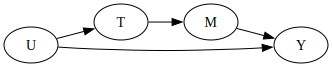

In [27]:
graphh = gr.Digraph(graph_attr={"rankdir":"LR"})
graphh.edge("U", "T")
graphh.edge("U", "Y")
graphh.edge("T", "M")
graphh.edge("M", "Y")

graphh

Here's a breakdown of the relationships and potential interpretations:

"U" as a Starting Point: "U" directly influences both "T" and "Y". This setup suggests "U" could be a foundational or initial condition, factor, or event that has direct outcomes or effects represented by "T" and "Y".

"T" Influencing "M": The edge from "T" to "M" indicates that whatever "T" represents, it directly contributes to or affects "M". In a process or causal chain, "T" could be an intermediary step that leads to "M".

"M" Leading to "Y": The relationship from "M" to "Y" suggests a further step in the process or sequence, where "M" has a direct impact on "Y". Given that "Y" is also directly influenced by "U", "Y" seems to be a pivotal or final outcome in this graph, affected by both initial and intermediary factors or events.
Overall Structure and Flow: The directed graph presents a system where "U" initiates a sequence of influences leading to "Y", with "T" and "M" acting as intermediary steps or processes. "Y" is depicted as a key node, being the convergence point of influences from both "U" and "M".

This graph can represent various real-world scenarios or conceptual models where an initial condition or factor leads to a series of processes or changes, culminating in a final outcome or state. The exact nature of these entities and their relationships would depend on the specific context in which this model is applied, such as stages in a manufacturing process, steps in a decision-making pathway, or phases in a project development timeline.

### Confounding Bias Explanation

Confounding bias is a primary source of distortion in research, and it occurs when an outside factor influences both the independent variable and the outcome, leading to a non-causal association. This happens, for instance, in scenarios where both the treatment and the outcome are influenced by a common cause. Consider a situation in human resources where you're evaluating whether a new management training program boosts employee engagement. The challenge arises because the program is voluntary, attracting predominantly high-performing managers while those who might benefit most are less likely to participate. Consequently, teams led by managers who underwent the training show higher engagement levels compared to those who did not. However, distinguishing the true effect of the training is complicated by the fact that being an effective manager—a common factor—could influence both participation in the training and team engagement independently of the training's actual impact.

To accurately determine the causal impact, it's essential to eliminate any indirect paths between the treatment and the outcome. This process isolates the direct effect of the intervention. For example, by accounting for the managers' capabilities before the training, any observed differences in outcomes can more confidently be attributed to the training itself, assuming manager quality is consistent across groups. In essence, addressing confounding bias involves controlling for any shared causes affecting both the treatment and the outcome.

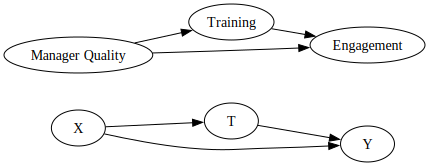

In [28]:
graphh = gr.Digraph(graph_attr={"rankdir":"LR"})
graphh.edge("X", "T")
graphh.edge("X", "Y")
graphh.edge("T", "Y")

graphh.edge("Manager Quality", "Training"),
graphh.edge("Manager Quality", "Engagement"),
graphh.edge("Training", "Engagement")

graphh

First Set of Relationships:
"X" as the Starting Point: The graph shows "X" influencing both "T" and "Y" directly. This setup positions "X" as a foundational element, possibly representing an initial condition, factor, or influence that affects both "T" (a subsequent step or process) and "Y" (an outcome or state).

"T" Influencing "Y": In addition to being influenced by "X", "T" also has a direct effect on "Y". This creates a pathway where "X" affects "Y" both directly and indirectly through "T", suggesting that "T" is an intermediary that modulates or contributes to the effect of "X" on "Y".

Second Set of Relationships:
"Manager Quality" as the Influencer: Here, "Manager Quality" directly influences both "Training" and "Engagement". This implies that the quality of management within an organization or team has a direct impact on the quality or extent of training provided, as well as on the overall engagement of team members or employees.

"Training" Leading to "Engagement": The edge from "Training" to "Engagement" indicates that the training provided (influenced by "Manager Quality") further affects engagement levels. This relationship suggests a process where good management not only directly enhances engagement but also does so indirectly by improving the quality or effectiveness of training.

Overall Interpretation:
The graph visually separates two conceptual models or systems of influence. In both cases, there is an initial factor or condition ("X" and "Manager Quality") that sets off a chain of influences leading to a key outcome ("Y" and "Engagement"), with at least one intermediary step or process ("T" and "Training").

The model underscores the importance of foundational qualities or conditions in determining outcomes, highlighting how direct and indirect influences combine to produce final results. In practical terms, it could be used to discuss the impact of initial conditions or leadership qualities on processes and outcomes in various contexts, such as project management, team performance, organizational behavior, or other areas where hierarchical or sequential influences are significant.

This graph serves as a tool for illustrating and reasoning about the pathways through which initial factors or qualities influence intermediate processes and final outcomes, emphasizing the complexity and interconnectivity of such systems.

### Surrogate Confounding

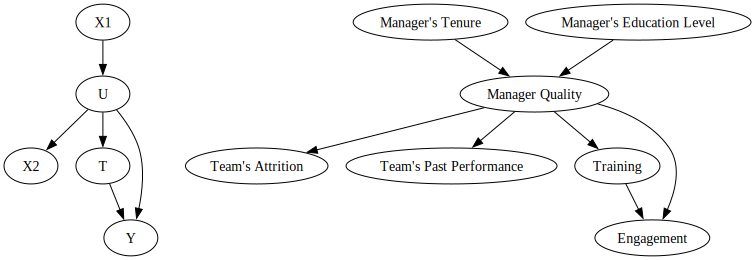

In [29]:
graphh = gr.Digraph()
graphh.edge("X1", "U")
graphh.edge("U", "X2")
graphh.edge("U", "T")
graphh.edge("T", "Y")
graphh.edge("U", "Y")

graphh.edge("Manager Quality", "Team's Attrition")
graphh.edge("Manager Quality", "Team's Past Performance")
graphh.edge("Manager's Tenure", "Manager Quality")
graphh.edge("Manager's Education Level", "Manager Quality")

graphh.edge("Manager Quality", "Training")
graphh.edge("Training", "Engagement")
graphh.edge("Manager Quality", "Engagement")

graphh

First Set of Relationships:
"X" as the Starting Point: The graph shows "X" influencing both "T" and "Y" directly. This setup positions "X" as a foundational element, possibly representing an initial condition, factor, or influence that affects both "T" (a subsequent step or process) and "Y" (an outcome or state).

"T" Influencing "Y": In addition to being influenced by "X", "T" also has a direct effect on "Y". This creates a pathway where "X" affects "Y" both directly and indirectly through "T", suggesting that "T" is an intermediary that modulates or contributes to the effect of "X" on "Y".

Second Set of Relationships:
"Manager Quality" as the Influencer: Here, "Manager Quality" directly influences both "Training" and "Engagement". This implies that the quality of management within an organization or team has a direct impact on the quality or extent of training provided, as well as on the overall engagement of team members or employees.

"Training" Leading to "Engagement": The edge from "Training" to "Engagement" indicates that the training provided (influenced by "Manager Quality") further affects engagement levels. This relationship suggests a process where good management not only directly enhances engagement but also does so indirectly by improving the quality or effectiveness of training.

Overall Interpretation:
The graph visually separates two conceptual models or systems of influence. In both cases, there is an initial factor or condition ("X" and "Manager Quality") that sets off a chain of influences leading to a key outcome ("Y" and "Engagement"), with at least one intermediary step or process ("T" and "Training").

The model underscores the importance of foundational qualities or conditions in determining outcomes, highlighting how direct and indirect influences combine to produce final results. In practical terms, it could be used to discuss the impact of initial conditions or leadership qualities on processes and outcomes in various contexts, such as project management, team performance, organizational behavior, or other areas where hierarchical or sequential influences are significant.

This graph serves as a tool for illustrating and reasoning about the pathways through which initial factors or qualities influence intermediate processes and final outcomes, emphasizing the complexity and interconnectivity of such systems.

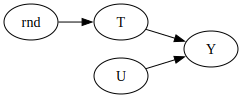

In [30]:
graphh = gr.Digraph(graph_attr={"rankdir":"LR"})
graphh.edge("rnd", "T")
graphh.edge("T", "Y")
graphh.edge("U", "Y")

graphh

sequence, "Y" could be an outcome, result, or effect that is directly influenced by "T". This suggests a process or pathway where "T" modifies, creates, or otherwise impacts "Y".

"U" Directly Influencing "Y": Independently of "T", "U" also has a direct pathway to "Y". This indicates that "Y" is not solely determined by "T" but also by "U", suggesting that "Y" is a complex outcome affected by multiple sources. "U" might represent an external factor, condition, or variable that, along with "T", plays a role in the emergence, development, or state of "Y".

Interpretation and Application:
This graph can be interpreted in various contexts depending on what "rnd", "T", "U", and "Y" represent. A few possible scenarios include:

Innovation and Outcome: If "rnd" stands for research and development, "T" could represent the application or implementation of R&D outputs, and "Y" the market success or product effectiveness. "U" might then represent market conditions or user needs, highlighting how both internal innovations and external factors contribute to outcomes.

Scientific Research: "rnd" could symbolize randomized treatment allocation in a study, "T" the treatment itself, "Y" the study outcome, and "U" other covariates or external influences on the outcome, emphasizing the multifactorial nature of research findings.
Project Development: "rnd" might be initial concept development or brainstorming, "T" the development or execution phase, and "Y" the project's completion or success, with "U" symbolizing unforeseen challenges or external support.

Overall, this graph models a system where an outcome or effect ("Y") is the result of a direct process or intervention ("T") that itself originates from a foundational element ("rnd"), all the while being influenced by an additional factor or condition ("U"). It highlights the interplay between different influences in determining outcomes, useful for illustrating complex causal or procedural relationships in various fields.

### Selection Bias
#### Conditioning on a Collider

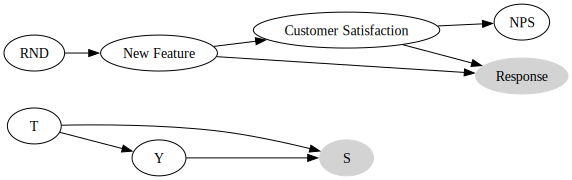

In [31]:
graphh = gr.Digraph(graph_attr={"rankdir": "LR"})
graphh.edge("T", "S")
graphh.edge("T", "Y")
graphh.edge("Y", "S")
graphh.node("S", color="lightgrey", style="filled")

graphh.edge("RND", "New Feature"),
graphh.edge("New Feature", "Customer Satisfaction"),
graphh.edge("Customer Satisfaction", "NPS"),
graphh.edge("Customer Satisfaction", "Response"),
graphh.edge("New Feature", "Response"),
graphh.node("Response", "Response", color="lightgrey", style="filled")

graphh

Abstract Model:
Relationships Among "T", "S", and "Y":
The graph begins with "T" influencing both "S" and "Y". This setup suggests that "T" is a foundational or initiating factor that has direct outcomes or effects represented by "S" and "Y".
"Y" further influences "S", indicating an interaction or process where "Y" contributes to or affects "S" beyond the initial impact of "T".

"S" is highlighted with a light grey fill, emphasizing its significance or role as a primary outcome or focal point in this model.

Product Development and Customer Feedback System:
Flow from "RND" to "Response":
"RND" leads to the implementation of a "New Feature", representing the innovation or development phase driven by research and development efforts.

The "New Feature" impacts both "Customer Satisfaction" and directly "Response". This suggests that introducing new features is expected to influence customer satisfaction levels and elicit responses, which might include feedback, reviews, or other forms of direct customer engagement.

"Customer Satisfaction" further influences "NPS" (Net Promoter Score, a metric for customer loyalty and satisfaction) and "Response". It highlights how customer satisfaction not only contributes to specific metrics like NPS but also plays a role in generating customer responses.

The "Response" node is also highlighted, indicating its importance as a key outcome in understanding customer reactions and feedback.

Interpretation and Application:
The abstract model could symbolize various theoretical or conceptual relationships where "T" initiates a process or series of effects leading to "S", with "Y" acting as an intermediary or additional influencer. It's a visualization of influence and outcome that can apply across different fields or studies.

The product development and customer feedback system reflects a common scenario in business and product management, where the introduction of new features based on R&D efforts is analyzed for its impact on customer satisfaction, loyalty (NPS), and direct customer responses. Highlighting "Response" underscores the value placed on direct customer feedback in evaluating the success of new features and overall customer satisfaction.


In [32]:
nps_model = nx.DiGraph([
   ("RND", "New Feature"),
#     ("New Feature", "Customer Satisfaction"),
    ("Customer Satisfaction", "NPS"),
    ("Customer Satisfaction", "Response"),
    ("New Feature", "Response"),
])


not(nx.d_separated(nps_model, {"NPS"}, {"New Feature"}, {"Response"}))

True

Here's the structure of nps_model as defined by the edges:

"RND" to "New Feature": This edge implies that R&D activities lead to the creation or implementation of new features. It represents the direct impact of innovation efforts on product development.
"Customer Satisfaction" to "NPS" and "Response": These edges indicate that customer satisfaction directly influences the Net Promoter Score (NPS) and the customers' responses. NPS is a metric used to gauge the loyalty of a firm's customer relationships, while responses can include any form of feedback or interaction from customers.

"New Feature" to "Response": This direct connection suggests that introducing new features can elicit responses from customers, independent of the overall customer satisfaction. This might represent immediate feedback, reviews, or other reactions specifically tied to the new features.

The line of code not(nx.d_separated(nps_model, {"NPS"}, {"New Feature"}, {"Response"})) investigates whether there's a dependency (or lack thereof) between "NPS" and "New Feature" when "Response" is observed or controlled for. In causal inference terms:

nx.d_separated() function checks for d-separation, a criterion indicating whether two sets of nodes in a graph are independent given a set of conditioning nodes. D-separation is used to infer potential causal relationships from the graph structure.

The function returns True if "NPS" and "New Feature" are d-separated (independent) given "Response", meaning that any path that might connect "NPS" and "New Feature" goes through "Response", blocking any direct or indirect influence between "NPS" and "New Feature".
Applying not() to the function's result reverses the logic: if not(nx.d_separated(...)) returns True, it suggests that "NPS" and "New Feature" are not independent given "Response", implying a potential indirect causal path exists that connects "NPS" to "New Feature" through "Response".


In [33]:
np.random.seed(2)
n = 100000
new_feature = np.random.binomial(1, 0.5, n)

satisfaction_0 = np.random.normal(0, 0.5, n)
satisfaction_1 = satisfaction_0 + 0.4
satisfaction = new_feature*satisfaction_1 + (1-new_feature)*satisfaction_0

nps_0 = np.random.normal(satisfaction_0, 1)
nps_1 = np.random.normal(satisfaction_1, 1)
nps = new_feature*nps_1 + (1-new_feature)*nps_0


responded  = (np.random.normal(0 + new_feature + satisfaction, 1) > 1).astype(int)

tr_dframe = pd.DataFrame(dict(new_feature=new_feature,
                          responded=responded,
                          nps_0=nps_0,
                          nps_1=nps_1,
                          nps=nps))

tr_df_measurable = pd.DataFrame(dict(new_feature=new_feature,
                                     responded=responded,
                                     nps_0=np.nan,
                                     nps_1=np.nan,
                                     nps=np.where(responded, nps, np.nan)))

tr_dframe.groupby("new_feature").mean()

,responded,nps_0,nps_1,nps
new_feature,,,,
0,0.183715,-0.005047,0.395015,-0.005047
1,0.639342,-0.005239,0.401082,0.401082



The random seed is set to 2 for reproducibility of the results.
n = 100000 establishes the number of simulated observations (customers).

New Feature Simulation:
new_feature is a binary variable generated with a 50% probability, indicating whether a new feature is present (1) or not (0) for each observation.

Customer Satisfaction:
Two sets of customer satisfaction scores are simulated:
satisfaction_0 represents satisfaction scores without the new feature, drawn from a normal distribution centered around 0 with a standard deviation of 0.5.

satisfaction_1 represents satisfaction scores with the new feature, calculated by adding 0.4 to each satisfaction_0 score to simulate a positive effect of the new feature on satisfaction.
satisfaction combines these two sets based on whether the new feature is present for each observation.

NPS Simulation:
Similar to satisfaction, two sets of NPS scores (nps_0 for no new feature, nps_1 for with the new feature) are simulated based on the respective satisfaction scores.

nps combines these two sets based on the presence of the new feature, intending to reflect how customer satisfaction influences NPS.

Response Simulation:
responded simulates whether customers responded to a survey or provided feedback, influenced by the presence of the new feature and their level of satisfaction.

Data Aggregation and Analysis:
Two DataFrames, tr_dframe and tr_df_measurable, are created to store the simulated data. The latter is specifically designed to include NPS scores only for respondents, using np.where to assign NaN for non-respondents.

Finally, tr_dframe is grouped by new_feature to calculate the mean of each column, aiming to analyze the average effect of the new feature on the other variables, including response rate and NPS.
The objective of this simulation is to understand how introducing a new feature might impact customer satisfaction and NPS and to see how these effects are captured in customer responses. It illustrates a method of using simulated data to explore potential impacts of product changes on key customer metrics, which can be especially useful in planning, product development, and customer relationship management. ​

In [34]:
tr_df_measurable.groupby("new_feature").mean().assign(**{"nps": np.nan})

,responded,nps_0,nps_1,nps
new_feature,,,,
0,0.183715,NaN,NaN,NaN
1,0.639342,NaN,NaN,NaN



Group by 'new_feature': The DataFrame tr_df_measurable is grouped by the column new_feature. This operation aggregates the data into two groups: those observations with the new feature (1) and those without it (0).

Calculate Mean: For each group created in the step above, the mean (average) of each column is calculated. This provides insights into the average behavior or characteristics of each group, such as the average response rate.

Assign NaN to 'nps': The .assign() method is then used to explicitly set the value of the 'nps' column to NaN (Not a Number) for the entire resultant DataFrame. This step indicates that, while the average values for other metrics (like response rate) are of interest, the specific average NPS value is either not calculated, not applicable, or intended to be ignored in this summary.

The intended result of this operation is a summary DataFrame where each row corresponds to one of the groups (new feature present or absent), with column values representing the mean of each measurable characteristic for those groups. However, the 'nps' column will explicitly have NaN values, indicating that the average NPS is not being considered or reported in this summary.

This approach can be useful in situations where you want to report or visualize average metrics across different groups but choose to exclude or withhold specific metrics from the summary due to reasons such as privacy concerns, lack of relevance, or pending data collection. ​

In [35]:
tr_df_measurable.groupby(["responded", "new_feature"]).mean()

nps_0  nps_1       nps
responded new_feature                        
0         0              NaN    NaN       NaN
          1              NaN    NaN       NaN
1         0              NaN    NaN  0.314073
          1              NaN    NaN  0.536106

In [36]:
tr_dframe.groupby(["responded", "new_feature"]).mean()

nps_0     nps_1       nps
responded new_feature                              
0         0           -0.076869  0.320616 -0.076869
          1           -0.234852  0.161725  0.161725
1         0            0.314073  0.725585  0.314073
          1            0.124287  0.536106  0.536106

### Adjusting for Selection Bias

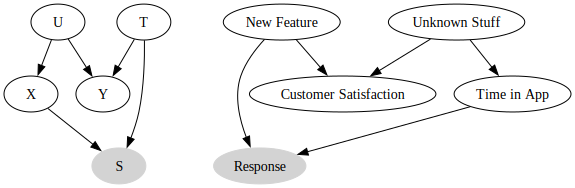

In [37]:
graphh = gr.Digraph()

graphh.edge("U", "X")
graphh.edge("X", "S")
graphh.edge("U", "Y")
graphh.edge("T", "Y")
graphh.edge("T", "S")
graphh.node("S", color="lightgrey", style="filled")

graphh.edge("New Feature", "Customer Satisfaction"),
graphh.edge("Unknown Stuff", "Customer Satisfaction"),
graphh.edge("Unknown Stuff", "Time in App"),
graphh.edge("Time in App", "Response"),
graphh.edge("New Feature", "Response"),

graphh.node("Response", "Response", color="lightgrey", style="filled")

graphh

First System: Abstract Model
Nodes and Edges:
"U" influences both "X" and "Y", suggesting that "U" might represent an underlying factor or condition affecting both "X" (an intermediary step or process) and "Y" (a potential outcome or state).

"X" directly influences "S", indicating a pathway where "X" contributes to or affects "S". Given that "S" is highlighted, it's likely a significant outcome or focal point within this system.
"T" influences both "Y" and "S", demonstrating that "T" is another factor or condition with multiple points of impact, including a direct connection to the significant outcome "S".

Significance of "S": The node "S" is filled with light grey, emphasizing its importance or centrality in this model. It could represent a critical outcome or state that is influenced by multiple pathways or variables.

Second System: Customer Interaction Model
Nodes and Edges:
"New Feature" and "Unknown Stuff" both influence "Customer Satisfaction" and "Response", indicating that these factors are considered to have a direct impact on customer perceptions and actions. The introduction of a "New Feature" could be seen as a positive influence, while "Unknown Stuff" might represent other external or unidentified factors affecting customer experience.
"Unknown Stuff" also influences "Time in App", suggesting a pathway where external or unidentified factors affect how much time customers spend in an application.

"Time in App" directly influences "Response", indicating a belief that the amount of time spent in the app by customers has a direct impact on their likelihood to respond or engage further.
Significance of "Response": Like "S" in the first system, "Response" is highlighted and could represent a key outcome or measure of interest, particularly in terms of customer engagement or feedback.
Overall Interpretation
The graph visually separates into two conceptual frameworks, each depicting different sets of relationships:

The abstract model (involving "U", "X", "Y", "T", "S") could symbolize theoretical or systemic relationships, where multiple factors influence key outcomes or states, emphasizing the complexity of interactions within a system.

The customer interaction model (involving "New Feature", "Unknown Stuff", "Customer Satisfaction", "Time in App", "Response") reflects a practical scenario in product management and customer experience, showing how product features and other factors influence customer satisfaction and engagement.

By highlighting "S" and "Response", the graph underscores the focus on understanding and analyzing key outcomes or points of interest influenced by various factors, providing insights into both abstract systems thinking and practical customer interaction analysis.

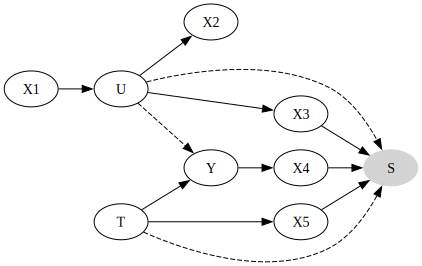

In [38]:
graphh = gr.Digraph(graph_attr={"rankdir": "LR"})

graphh.edge("X1", "U")
graphh.edge("U", "X2")
graphh.edge("X5", "S")
graphh.edge("U", "Y",style="dashed")
graphh.edge("U", "S",style="dashed")
graphh.edge("U", "X3")
graphh.edge("X3", "S")
graphh.edge("Y", "X4")
graphh.edge("X4", "S")
graphh.edge("T", "X5")
graphh.edge("T", "Y")
graphh.edge("T", "S", style="dashed")
graphh.node("S", color="lightgrey", style="filled")

graphh

In your updated Graphviz directed graph graphh, set with a left-to-right orientation ("LR"), you introduce a complex network of nodes and edges that depict various direct and indirect relationships, with particular emphasis on dashed edges to indicate perhaps weaker or hypothesized connections, and the node "S" highlighted as a significant outcome or focus point. Here's a detailed interpretation:

Nodes and Direct Relationships:
Start Points "X1", "T", "X5": These nodes serve as initial factors or inputs, with "T" being a particularly central node influencing multiple outcomes directly, including "Y", "X5", and indirectly "S".
Intermediary Nodes "U", "X2", "X3", "X4", "Y": Serve as connectors or process steps within the system. "U" emerges as a pivotal node with multiple direct influences on "X2", "X3", "Y", and indirect (dashed) influences on "S" and "Y".

Outcome or Target "S": Highlighted in light grey, "S" represents a significant outcome or state, receiving inputs from "X5", "X3", "X4", and indirectly from "U" and "T". The emphasis on "S" suggests it's a critical measure or result within this system.

Dashed Edges as Hypothetical or Indirect Influences:
"U" to "Y" and "S": The dashed lines might suggest a hypothesized, weaker, or indirect influence of "U" on "Y" and "S", indicating these relationships are considered relevant but perhaps not as strongly established or direct as others.
"T" to "S": Similarly, the dashed line from "T" to "S" might indicate an indirect or less certain influence of "T" on the significant outcome "S".

Interpretation:
System Dynamics and Processes: This graph models a system where initial inputs or conditions ("X1", "T", "X5") undergo various processes or transformations (through "U", "X2", "X3", "X4", "Y") leading to the outcome "S". "T" and "U" are key influencers in this system, with "T" acting as a primary external or initiating factor and "U" as a central intermediary influencing multiple paths.
Hypothesized Relationships: The use of dashed edges to connect "U" and "T" to "Y" and "S" introduces a layer of hypothesis or speculation about these relationships, suggesting areas for further investigation or highlighting the complexity of direct versus indirect influences in the system.

Focus on Outcome "S": Highlighting "S" underscores the graph's focus on understanding factors leading to this outcome, making it a focal point for analysis or decision-making.

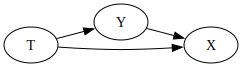

In [39]:
graphh = gr.Digraph(graph_attr={"rankdir":"LR"})

graphh.edge("Y", "X")
graphh.edge("T", "X")
graphh.edge("T", "Y")

graphh

Nodes and Relationships:
"T" as a Starting Point: The node "T" directly influences both "X" and "Y". This setup positions "T" as a foundational element, factor, or influence that has direct outcomes or effects represented by "X" and "Y". It suggests that "T" could be an initial condition, event, or action that sets the subsequent outcomes or states in motion.

"Y" Influencing "X": In addition to being influenced by "T", "Y" also has a direct impact on "X". This indicates a sequential or hierarchical relationship where "T" initiates a process or condition that affects "Y", and then "Y", in turn, influences "X".

Interpretation and Application:
The graph models a scenario where an initial factor or condition "T" influences two outcomes or states, "Y" and "X", with "Y" also contributing directly to "X". This could symbolize a variety of real-world or theoretical situations where an initiating action or condition leads to multiple effects or outcomes, some of which are interdependent.

Possible Real-World Scenarios:
In a business context, "T" could represent a strategic decision or change in policy, "Y" could symbolize an intermediate outcome such as team morale or operational efficiency, and "X" might be a final outcome like product quality or customer satisfaction.

In a scientific or technical process, "T" might be an experimental treatment or a new technology introduction, "Y" could be an immediate effect or reaction, and "X" a downstream impact or result based on the initial treatment and its immediate effects.

Sequential Influence and Feedback Loops: The structure suggests not only a sequential influence but also potential feedback loops where outcomes feedback into the system, influencing further actions or decisions. For instance, the impact of "X" might, in a broader or extended model, influence future instances of "T" or "Y".

This graph serves as a simplified yet powerful tool for conceptualizing and visualizing sequences of influence or causal relationships, applicable across various fields and disciplines where understanding the flow and impact of decisions, conditions, or treatments is crucial.

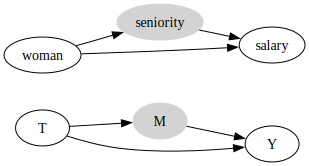

In [40]:
graphh = gr.Digraph(graph_attr={"rankdir": "LR"})
graphh.edge("T", "M")
graphh.edge("T", "Y")
graphh.edge("M", "Y")
graphh.node("M", color="lightgrey", style="filled")

graphh.edge("woman", "seniority")
graphh.edge("woman", "salary")
graphh.edge("seniority", "salary")
graphh.node("seniority", color="lightgrey", style="filled")

graphh

First System: Abstract Model with "T", "M", and "Y"

Nodes and Edges:
"T" directly influences both "M" and "Y". This could indicate that "T" represents a type of treatment or trigger event that affects both an intermediary outcome or mediator ("M") and a final outcome ("Y").

"M" has a direct effect on "Y", suggesting that the influence of "T" on "Y" is at least partly mediated through "M". This is a classic setup in causal inference studies where "M" could represent a mechanism through which "T" exerts its influence on "Y".

Significance of "M": The node "M" is highlighted, indicating its importance as a mediator in the relationship between "T" and "Y". This emphasis might suggest a particular interest in understanding how "M" contributes to the effect of "T" on "Y".

Second System: Gender, Seniority, and Salary
Nodes and Edges:
The "woman" node influences both "seniority" and "salary", suggesting that gender (being a woman in this context) is considered to have a direct impact on both professional seniority and salary levels.

"Seniority" also influences "salary", indicating that the level of seniority is a determinant of salary, which is a well-documented phenomenon in labor economics and HR management.
Significance of "seniority": Like "M" in the first system, "seniority" is highlighted, underscoring its role as a crucial factor in determining salary, as well as being influenced by gender. This might reflect an interest in exploring how seniority mediates the relationship between gender and salary.
Overall Interpretation
Your graph models two distinct but structurally similar systems:

The first explores an abstract relationship where a treatment or condition ("T") affects an outcome ("Y") both directly and through a mediator ("M"). This setup is common in experimental and observational studies where the mediation effect is of interest.
The second system deals with gender disparities in the workplace, particularly focusing on how being a woman impacts seniority and salary, and how seniority further affects salary. This highlights real-world concerns about gender equality and the mechanisms through which disparities manifest.
By highlighting "M" and "seniority", the graph brings attention to the mediating roles these factors play in their respective systems, offering a visual framework for understanding complex relationships between variables. This graphical representation can be a powerful tool for illustrating and discussing causal pathways in both theoretical and applied contexts.

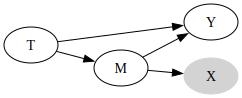

In [41]:
graphh = gr.Digraph(graph_attr={"rankdir": "LR"})
graphh.edge("T", "M")
graphh.edge("T", "Y")
graphh.edge("M", "Y")
graphh.edge("M", "X")
graphh.node("X", color="lightgrey", style="filled")

graphh

In your revised Graphviz directed graph graphh, set with a horizontal orientation ("LR"), you've mapped out a system involving the variables "T", "M", "Y", and a new variable "X". The edges between these nodes represent direct influences or relationships, and you've highlighted "X" to indicate its particular significance or role within this system. Here’s a closer look at the structure and potential implications:

Structure and Relationships:
"T" as the Initial Factor: The graph shows "T" directly influencing both "M" and "Y". This configuration suggests "T" could represent an initial treatment, condition, or cause that affects an intermediary outcome or mediator "M", as well as having a direct effect on the final outcome "Y".

"M" Mediating and Influencing: "M" not only mediates the effect of "T" on "Y" but also directly influences "Y" and "X". This setup indicates "M" as a crucial intermediary that plays a significant role in the system, affecting both the final outcome "Y" and another variable "X".

"X" Highlighted: You've chosen to highlight "X", filling its node with light grey, which draws attention to "X" as a significant variable within this model. Given its placement and the direct influence from "M", "X" might represent a specific outcome of interest, potentially a secondary or related outcome that's affected by the mediation process.

Interpretation and Applications:
The graph models a scenario where an initial cause or condition ("T") has both direct and indirect effects on a final outcome ("Y"), with "M" serving as a mediator. Additionally, the model considers the influence of this process on another significant variable ("X"), which might represent various concepts depending on the context, such as a specific behavior, state, or effect.

This structure is emblematic of mediation analysis in causal inference, where the interest lies in understanding not just whether and how "T" affects "Y", but also in delineating the pathway through "M". The inclusion and highlighting of "X" suggest an extension of traditional mediation models to explore additional outcomes influenced by the mediator.

Practical Example: In a public health context, "T" might be an intervention (like a health program), "M" could represent a change in behavior or attitude due to the intervention, "Y" might be a primary health outcome (like reduced disease incidence), and "X" could represent a secondary outcome (like quality of life) that's also important but is influenced through "M".


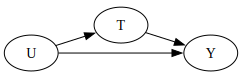

In [42]:
graphh = gr.Digraph(graph_attr={"rankdir":"LR", "ratio": "0.3"})
graphh.edge("U", "T")
graphh.edge("U", "Y")
graphh.edge("T", "Y")

graphh

Your Graphviz directed graph graphh, configured with a horizontal layout ("LR") and a specific aspect ratio ("ratio": "0.3"), succinctly models a system involving three entities: "U", "T", and "Y". The directed edges indicate the relationships or influences among these entities. Here’s an interpretation of this setup:

Structure and Relationships:
"U" as the Initial Factor: "U" is shown to directly influence both "T" and "Y". This suggests that "U" could represent an underlying cause, condition, or variable that has a direct effect on both an intermediary variable or process "T" and an outcome or state "Y".
"T" Influencing "Y": In addition to the direct influence from "U", "T" also has a direct pathway to "Y". This indicates that "T" serves as a mediator or intermediary step that further affects "Y", potentially modifying, mediating, or amplifying the influence initially exerted by "U".

Interpretation and Application:
The graph models a scenario where an initial factor ("U") impacts an outcome ("Y") both directly and indirectly through a mediator ("T"). This structure is typical in causal inference studies, where the interest lies in understanding not just the direct effects but also the pathways through which an initial factor influences an outcome.
Practical Example: In a policy analysis context, "U" might represent a specific policy change, "T" could be the implementation process or the public's reception to the policy, and "Y" might be the ultimate impact of the policy on a social or economic outcome. The model would then serve to illustrate that the policy's impact on the outcome is mediated by the process of its implementation or reception, while also considering the policy's direct effects.
Aspect Ratio ("ratio": "0.3"): This parameter affects the layout's appearance, making the graph more elongated horizontally. This choice might be particularly useful for presentations or documents where space is limited horizontally, or to emphasize the sequential or process-oriented nature of the relationships among "U", "T", and "Y".

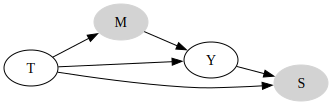

In [43]:
graphh = gr.Digraph(graph_attr={"rankdir":"LR"})
graphh.edge("T", "M")
graphh.edge("M", "Y")
graphh.edge("T", "Y")
graphh.edge("T", "S")
graphh.edge("Y", "S")

graphh.node("M", color="lightgrey", style="filled")
graphh.node("S", color="lightgrey", style="filled")

graphh

Your Graphviz directed graph graphh, with a left-to-right orientation ("LR"), depicts a nuanced system of interactions among four entities: "T", "M", "Y", and "S". The directed edges signify the influence or causal relationships between these entities, and you've highlighted "M" and "S" to indicate their significance or roles within this framework. Here's a detailed interpretation:

Nodes and Relationships:
"T" as a Central Initiator: "T" directly influences all other entities in the graph ("M", "Y", and "S"), positioning it as a primary factor, cause, or condition that sets in motion the outcomes or states represented by the other nodes.

"M" Mediating Between "T" and "Y": The pathway from "T" to "M" to "Y" suggests that "M" acts as a mediator or intermediary variable that partially channels the influence of "T" on "Y". The highlighting of "M" emphasizes its critical role in this mediation process.

Direct and Indirect Influences on "Y" and "S":
Beyond being influenced by "M", "Y" is also directly impacted by "T", indicating that "Y" is a complex outcome affected by multiple sources.

"S" is influenced directly by "T" and indirectly by "Y", suggesting that "S" represents a secondary or subsequent outcome or state that emerges from the initial action or condition "T" as well as the outcomes represented by "Y".

Interpretation and Application:
This graph models a scenario where an initial factor ("T") triggers a series of effects leading to multiple outcomes ("Y" and "S"), with "M" serving as an important mediator in this process. The direct influence of "T" on "Y" and "S", alongside the mediated influence through "M", illustrates the complexity of causal pathways and outcomes.

Practical Example: In a business context, "T" might represent a strategic initiative or investment, "M" could be an operational change or improvement that directly results from "T", "Y" might symbolize a primary business objective such as revenue growth, and "S" could represent a broader impact like market share or customer satisfaction. The model then illustrates how strategic initiatives can have both direct and mediated effects on various business outcomes.

Significance of Highlighted Nodes: Highlighting "M" and "S" draws attention to their roles as key variables within the system. "M" is highlighted to underscore its mediating function, while "S" is highlighted to denote its status as a crucial outcome or effect that warrants specific attention, possibly due to its broader or long-term implications.

This directed graph serves as a conceptual tool for visualizing and reasoning about complex relationships and causal pathways in various fields, from business and economics to social science and public policy, facilitating a deeper understanding of how initial actions or conditions lead to multiple, interconnected outcomes.


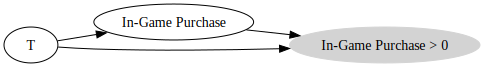

In [44]:
graphh = gr.Digraph(graph_attr={"rankdir":"LR"})
graphh.edge("T", "In-Game Purchase")
graphh.edge("T", "In-Game Purchase > 0")
graphh.edge("In-Game Purchase", "In-Game Purchase > 0")

graphh.node("In-Game Purchase > 0", color="lightgrey", style="filled")

graphh

Nodes and Relationships:
"T" Influencing In-Game Purchases: The graph starts with "T", which could represent a treatment, trigger, or specific condition, directly influencing two outcomes: "In-Game Purchase" and "In-Game Purchase > 0". This suggests that "T" has a direct impact on whether players make in-game purchases and whether those purchases exceed a certain threshold.

In-Game Purchases Leading to Threshold Exceedance: There's also a direct link from "In-Game Purchase" to "In-Game Purchase > 0", indicating a logical progression where engaging in in-game purchases is a prerequisite for those purchases to exceed a certain value.

This relationship emphasizes the flow from making any purchase to making significant (or quantified) purchases.

Highlighting "In-Game Purchase > 0": The node representing purchases that exceed a threshold is highlighted, suggesting it's a significant outcome or point of interest, possibly because it's associated with higher player engagement, increased revenue, or other important metrics.

Interpretation and Application:
This graph models the causality and progression within the domain of in-game purchases, showing how an initial condition or treatment ("T") can influence purchasing behavior, both in terms of occurrence and magnitude.

Potential Use Cases:
Game Development and Monetization Strategy: Understanding the factors ("T") that lead not only to any in-game purchase but specifically to purchases above a certain threshold can inform strategies for increasing player spending. This might include special promotions, in-game events, or the introduction of desirable items or features that encourage higher spending.

Player Engagement Analysis: The model could also be used to study player engagement, where exceeding a spending threshold might correlate with higher engagement or commitment to the game. Identifying the triggers for such spending can help developers create more engaging content.

Significance for Research and Marketing: By highlighting the transition to "In-Game Purchase > 0", the graph underscores the importance of understanding what drives players to not just spend money in-game but to do so at levels that are significant for the game's revenue model. This can be crucial for targeted marketing campaigns, game design decisions, and player retention strategies.

In summary, your directed graph serves as a conceptual model for dissecting and understanding the pathways through which certain conditions or treatments influence in-game purchasing behavior, emphasizing the step from any level of spending to more significant spending levels. This model could be instrumental in guiding data-driven decisions in game development and marketing strategies.

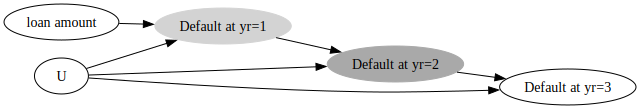

In [45]:
graphh = gr.Digraph(graph_attr={"rankdir": "LR"})
graphh.edge("loan amount", "Default at yr=1")
graphh.edge("Default at yr=1", "Default at yr=2")
graphh.edge("Default at yr=2", "Default at yr=3")
graphh.edge("U", "Default at yr=1")
graphh.edge("U", "Default at yr=2")
graphh.edge("U", "Default at yr=3")

graphh.node("Default at yr=1", color="lightgrey", style="filled")
graphh.node("Default at yr=2", color="darkgrey", style="filled")

graphh

Structure and Relationships:
Loan Amount Influencing Default at Year 1: The graph starts with the "loan amount" directly influencing the "Default at yr=1". This suggests a hypothesis or observation that the initial loan amount has a direct impact on the likelihood of a default in the first year, possibly indicating that higher loan amounts might carry a higher risk of initial default.

Sequential Default Risk: The graph models a cascading risk of default, where a default in the first year ("Default at yr=1") leads to a subsequent risk in the second year ("Default at yr=2"), which in turn influences the risk in the third year ("Default at yr=3"). This sequential relationship highlights how early default is a predictor of continued risk in subsequent years.

"U" as an Underlying Influence: The unspecified factor "U" is shown to directly influence the default risk in all three years. This could represent any number of unmeasured or latent variables that impact the default risk, such as economic conditions, changes in employment status, or other personal factors not captured by the loan amount alone.

Highlighting and Significance:
Highlighted Nodes:
"Default at yr=1" is filled with light grey, and "Default at yr=2" with dark grey, drawing attention to these early years in the default sequence. This might suggest a focus on early intervention or the importance of understanding factors that contribute to the escalation of default risk over time.

Implications for Analysis and Intervention:
By modeling the influence of both the initial loan amount and the unspecified "U" factor on default risk, the graph underscores the multifactorial nature of loan defaults. It suggests that interventions to reduce default risk need to consider both financial factors (like loan amount) and broader economic or personal conditions represented by "U".

The sequential nature of the defaults indicates that preventing early defaults could be key to reducing long-term risk, highlighting the potential value of targeted support or restructuring for borrowers at risk of defaulting in the first year.

Application:
This graph can serve as a conceptual model for financial institutions, policymakers, or researchers aiming to understand and mitigate the risk of loan defaults. It emphasizes the importance of early detection and intervention, as well as the need to consider a broad range of influencing factors beyond just the initial loan amount.

Conclusion:

Wraps up by highlighting key principles of graphical models for causality, emphasizing the understanding of causation flow, addressing confounding, and the necessity for accurate model specification.

This notebook stands as a comprehensive resource for individuals keen on grasping data-driven causal relationships and their graphical representation and analysis through Python and graphical modeling techniques.


LICENSE¶

MIT License

Copyright (c) 3022 Sanat Popli

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE

### Reference:
https://matheusfacure.github.io/python-causality-handbook/01-Introduction-To-Causality.html 

https://economyoftime.net/a-causal-look-into-the-factors-of-world-happiness-0-causal-graphs-b8f4dd1f13c3

https://www.kaggle.com/code/bindalnikhil/causal-graph-inference-using-causalnex

https://www.youtube.com/watch?v=DXBPtpBhGqo